In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('Cars93.csv')

In [4]:
def model(x, coefs):
    y = np.zeros(len(x))
    p = len(coefs)
    for i in range(p):
        y += coefs[i] * x**(p-i-1)
    return y

def mse(y_a, y_b):
    d = (y_a - y_b)**2
    return d.mean()
    
def bci(y_obs, y_model, p=2):
    n = len(y_obs)
    sigma = np.std(y_obs)
    loglike = np.sum(-0.5*(y_obs-y_model)**2/sigma**2)
    loglike -= n * np.log(np.sqrt(2.0 * np.pi * sigma**2))
    return np.log(n) * (p+1) - 2.0*loglike
    
def cross_validation(X, Y, n_groups=2, p=2):
    n_points = len(Y)
    ids = np.arange(n_points)
    group_ids = ids % n_groups
    mse_groups = np.zeros(n_groups)
    bci_groups = np.zeros(n_groups)
    for i in range(n_groups):
        ii = (group_ids ==i)
        validation_X = X[ii]
        train_X = X[~ii]
        
        validation_Y = Y[ii]
        train_Y = Y[~ii]
        
        c = np.polyfit(train_X, train_Y, p)
        Y_model = model(validation_X, c)
        mse_groups[i] = mse(Y_model, validation_Y)
        
    return mse_groups.mean()

Text(0,0.5,'Leave One Out MSE')

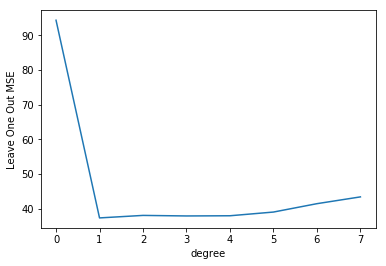

In [9]:
X = np.array(data['Horsepower'])
Y = np.array(data['Price'])

degrees = np.arange(8)
n_degrees = len(degrees)
SV_leave_one_out = np.zeros(n_degrees)

for i in range(n_degrees):
    SV_leave_one_out[i]  = cross_validation(X,Y, n_groups=len(X), p=degrees[i])

plt.plot(degrees, SV_leave_one_out)
plt.xlabel("degree")
plt.ylabel("Leave One Out MSE")

Text(0,0.5,'k-fold MSE (k=10)')

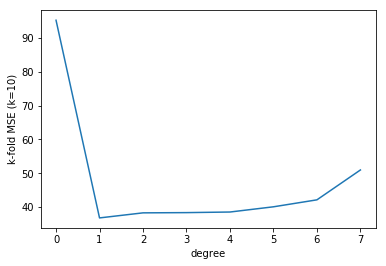

In [6]:
X = np.array(data['Horsepower'])
Y = np.array(data['Price'])

degrees = np.arange(8)
n_degrees = len(degrees)
SV_kfold = np.zeros(n_degrees)

for i in range(n_degrees):
    SV_kfold[i]  = cross_validation(X,Y, n_groups=8, p=degrees[i])

plt.plot(degrees, SV_kfold)
plt.xlabel("degree")
plt.ylabel("k-fold MSE (k=10)")

Text(0,0.5,'Bayesian Information Criterion')

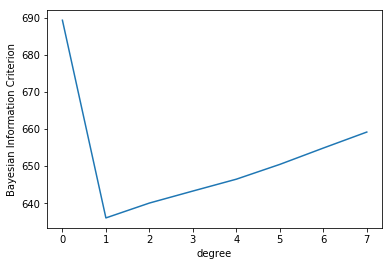

In [7]:
X = np.array(data['Horsepower'])
Y = np.array(data['Price'])

degrees = np.arange(8)
n_degrees = len(degrees)
BCI_degree = np.zeros(n_degrees)

for i in range(n_degrees):
    c = np.polyfit(X, Y, degrees[i])
    Y_model = model(X, c)
    BCI_degree[i] = bci(Y, Y_model, p=degrees[i])

plt.plot(degrees, BCI_degree)
plt.xlabel("degree")
plt.ylabel("Bayesian Information Criterion")

In [10]:
np.__version__

'1.11.3'